# Model 5 - MLP Classifier

# Read Datset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\INeuron_Project\ineuron_creditcard_ml\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1 = df.drop(labels=['ID'],axis=1)

In [4]:
df1['SEX']=df['SEX'].astype(str)
df1['EDUCATION']=df['EDUCATION'].astype(str)
df1['MARRIAGE']=df['MARRIAGE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# Defining X and Y

In [5]:
X = df1.drop(labels=['default.payment.next.month'],axis=1)
Y = df1[['default.payment.next.month']]

In [6]:
from definitions import catcon
cat, con = catcon(X)

Categorical and Continuous variables appended


# Adding MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,False,True,False,False,False,False,False,True,False,False
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,False,True,False,False,False,False,False,False,True,False
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,False,True,False,False,False,False,False,False,True,False
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,False,True,False,False,False,False,False,True,False,False
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,False,True,False,False,False,False,False,True,False,False


# Saving MinMaxScaler as Pickle File

In [9]:
import os
os.makedirs('./MinMaxScalerPickle', exist_ok=True)


In [10]:
import pickle
with open('./MinMaxScalerPickle/mmMLP.pkl', 'wb') as files:
    pickle.dump(mm, files)

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Creating Neural Network with MLP Classifier

In [12]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh')
nn = mlpc.fit(xtrain,ytrain)
tr_pred = nn.predict(xtrain)
ts_pred = nn.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc =accuracy_score(tr_pred,ytrain)
ts_acc =accuracy_score(ts_pred,ytest)
tr_rec =recall_score(tr_pred,ytrain)
ts_rec =recall_score(ts_pred,ytest)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8297
Testing Accuracy  :  0.82
Training Recall   :  0.7075
Testing Recall    :  0.6858


<Axes: >

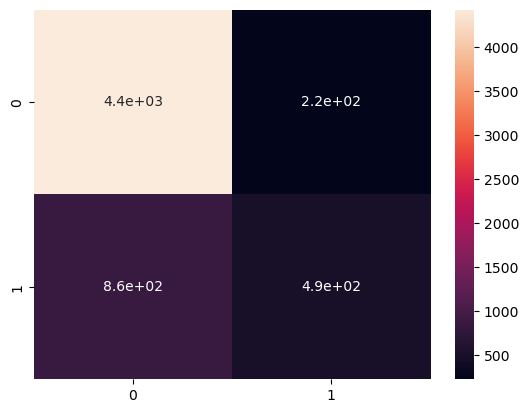

In [13]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest, ts_pred)
import seaborn as sb
sb.heatmap(cf,annot=True)

In [14]:
from sklearn.metrics import classification_report
clsrep = classification_report(ytest,ts_pred)
print(clsrep)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4654
           1       0.69      0.36      0.48      1346

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# Save Pickle File

In [15]:
import pickle
with open('./Modelss/MLPmodel.pkl', 'wb') as files:
    pickle.dump(nn, files)